In [1]:
!pip install evaluate
!pip install rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=a0b1e9d22c6ccbd791aa58f80020181e0a01031d9d226f3dc6e13278c6f6633b
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [2]:
import torch
from transformers import AutoModelForCausalLM
from PIL import Image
import numpy as np
import os

### Loading the saved model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("microsoft/git-base")

loaded_model =  AutoModelForCausalLM.from_pretrained("microsoft/git-base")
loaded_optimizer = torch.optim.AdamW(loaded_model.parameters(), lr=5e-5)

# Load the saved model and optimizer state
loaded_model.load_state_dict(torch.load(r'/content/drive/MyDrive/Capstone (Shared)/3k_finetuned_model_weights/finetuned_model', map_location=torch.device('cpu')))
loaded_optimizer.load_state_dict(torch.load(r'/content/drive/MyDrive/Capstone (Shared)/3k_finetuned_model_weights/optimizer_state', map_location=torch.device('cpu')))

# Set the model to evaluation mode for inference
loaded_model.eval()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

GitForCausalLM(
  (git): GitModel(
    (embeddings): GitEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(1024, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (image_encoder): GitVisionModel(
      (vision_model): GitVisionTransformer(
        (embeddings): GitVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
          (position_embedding): Embedding(197, 768)
        )
        (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (encoder): GitVisionEncoder(
          (layers): ModuleList(
            (0-11): 12 x GitVisionEncoderLayer(
              (self_attn): GitVisionAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
             

### Caption generation

In [5]:
test_image_path = r"/content/drive/MyDrive/Capstone (Shared)/Images_3k_processed/test"
train_image_path = r"/content/drive/MyDrive/Capstone (Shared)/Images_3k_processed/train"

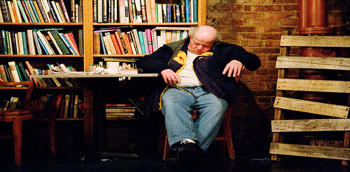

a man is sitting at a table with a book and a bookcase


In [8]:
import random

image = os.listdir(train_image_path)[random.randint(0,500)]
image_path = os.path.join(train_image_path, image)
image = Image.open(image_path)
width, height = image.size
display(image.resize((int(0.7*width), int(0.5*height))))

# device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt") #.to(device)
pixel_values = inputs.pixel_values
generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

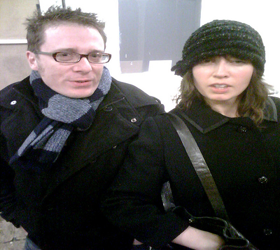

a man and a woman in black are standing in front of a white wall


In [9]:
image = os.listdir(test_image_path)[random.randint(0,500)]
image_path = os.path.join(test_image_path, image)
image = Image.open(image_path)
width, height = image.size
display(image.resize((int(0.7*width), int(0.5*height))))

# device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt") #.to(device)
pixel_values = inputs.pixel_values
generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

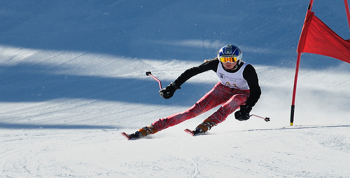

a snowboarder in a black jacket and red pants is skiing down a snowy hill


In [10]:
image = os.listdir(test_image_path)[random.randint(0,500)]
image_path = os.path.join(test_image_path, image)
image = Image.open(image_path)
width, height = image.size
display(image.resize((int(0.7*width), int(0.5*height))))

# device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt") #.to(device)
pixel_values = inputs.pixel_values
generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

# Evaluate test set based on Rouge Score

In [14]:
import evaluate
rouge = evaluate.load('rouge')

In [17]:
import json
data_dict = {}
with open(r"/content/drive/MyDrive/Capstone (Shared)/Images_3k_processed/test/metadata.jsonl", 'r') as file:
  for line in file:
    data = json.loads(line)
    filename = data['file_name']
    text = data['text']
    data_dict[filename] = text

In [18]:
print(len(data_dict))

2195


In [19]:
from tqdm import tqdm
#initialize list to store generated captions and the human generated captions
gen_cap = []
orig_cap = []
for filename in tqdm(os.listdir(test_image_path)):
    # Check if the file is an image (you can add more image extensions if needed)
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        path = test_image_path +'/'+ filename
        image = Image.open(path)
        inputs = processor(images=image, return_tensors="pt") #.to(device)
        pixel_values = inputs.pixel_values
        generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=50)
        generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        gen_cap.append(generated_caption)
        orig_cap.append(data_dict[filename])


100%|██████████| 440/440 [22:29<00:00,  3.07s/it]


In [20]:
rouge.compute(predictions = gen_cap, references = orig_cap)

{'rouge1': 0.33488602463278366,
 'rouge2': 0.11041975107527478,
 'rougeL': 0.31270029630812357,
 'rougeLsum': 0.3127711369197904}